In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [2]:
df = pd.read_csv('sonar.csv',names=range(0,61),header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

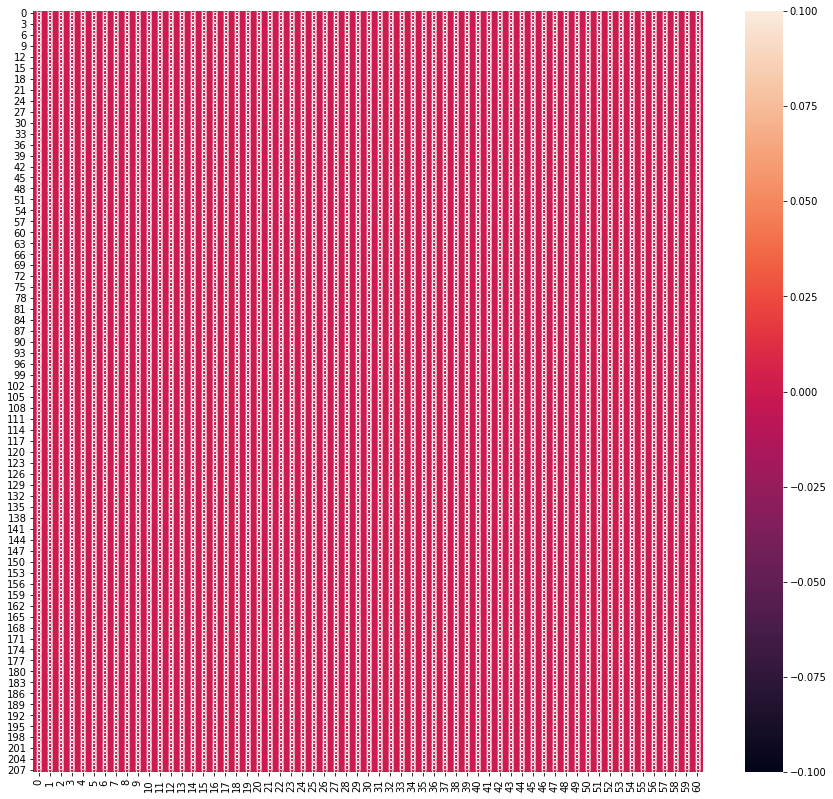

In [4]:
plt.figure(figsize=(15,14))
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [5]:
x = df.iloc[:,0:-1]
x.shape

(208, 60)

In [6]:
pca = PCA(n_components=10)

In [7]:
x = pca.fit_transform(x)
x.shape

(208, 10)

In [8]:
x = pd.DataFrame(data=x)

In [9]:
x.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [10]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [11]:
y = df.iloc[:,-1]
y.shape

(208,)

In [12]:
y.unique()

array(['R', 'M'], dtype=object)

In [13]:
le= LabelEncoder()
y = le.fit_transform(y)

In [14]:
Model_accuracy = pd.DataFrame(columns = ['Model','Accuracy Score'])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.22,random_state=45)

In [17]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg = lg.predict(x_test)
acc = accuracy_score(y_test,predlg)
print('Accuracy score : ',accuracy_score(y_test,predlg))
print('Confusion matrix : \n',confusion_matrix(y_test,predlg))
print('Classification report : \n',classification_report(y_test,predlg))
Model_accuracy = Model_accuracy.append({'Model':'Logistic Regression','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.8043478260869565
Confusion matrix : 
 [[20  1]
 [ 8 17]]
Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.94      0.68      0.79        25

    accuracy                           0.80        46
   macro avg       0.83      0.82      0.80        46
weighted avg       0.84      0.80      0.80        46



In [18]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb = gnb.predict(x_test)
acc = accuracy_score(y_test,predgnb)
print('Accuracy score : ',accuracy_score(y_test,predgnb))
print('Confusion matrix : \n',confusion_matrix(y_test,predgnb))
print('Classification report : \n',classification_report(y_test,predgnb))
Model_accuracy = Model_accuracy.append({'Model':'GuassianNB','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.8260869565217391
Confusion matrix : 
 [[20  1]
 [ 7 18]]
Classification report : 
               precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       0.95      0.72      0.82        25

    accuracy                           0.83        46
   macro avg       0.84      0.84      0.83        46
weighted avg       0.85      0.83      0.83        46



In [19]:
dtc = DecisionTreeClassifier()
grid_param = { 'criterion' : ['gini','entropy']}
gd_sr = GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.6854166666666666


In [20]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt = dt.predict(x_test)
acc = accuracy_score(y_test,preddt)
print('Accuracy score : ',accuracy_score(y_test,preddt))
print('Confusion matrix : \n',confusion_matrix(y_test,preddt))
print('Classification report : \n',classification_report(y_test,preddt))
Model_accuracy = Model_accuracy.append({'Model':'Decision Tree Classifier','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.717391304347826
Confusion matrix : 
 [[17  4]
 [ 9 16]]
Classification report : 
               precision    recall  f1-score   support

           0       0.65      0.81      0.72        21
           1       0.80      0.64      0.71        25

    accuracy                           0.72        46
   macro avg       0.73      0.72      0.72        46
weighted avg       0.73      0.72      0.72        46



In [21]:
knnc = KNeighborsClassifier()
grid_param = { 'n_neighbors' : [5,10,15,20,25,30]}
gd_sr = GridSearchCV(estimator=knnc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'n_neighbors': 5}
0.7964015151515151


In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
acc = accuracy_score(y_test,predknn)
print('Accuracy score : ',accuracy_score(y_test,predknn))
print('Confusion matrix : \n',confusion_matrix(y_test,predknn))
print('Classification report : \n',classification_report(y_test,predknn))
Model_accuracy = Model_accuracy.append({'Model':'KNN','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.8043478260869565
Confusion matrix : 
 [[19  2]
 [ 7 18]]
Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.90      0.72      0.80        25

    accuracy                           0.80        46
   macro avg       0.82      0.81      0.80        46
weighted avg       0.82      0.80      0.80        46



In [23]:
svc = SVC()
grid_param = { 'kernel' : ['rbf','poly','linear']}
gd_sr = GridSearchCV(estimator=svc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'kernel': 'rbf'}
0.778219696969697


In [24]:
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
acc = accuracy_score(y_test,predsvc)
print('Accuracy score : ',accuracy_score(y_test,predsvc))
print('Confusion matrix : \n',confusion_matrix(y_test,predsvc))
print('Classification report : \n',classification_report(y_test,predsvc))
Model_accuracy = Model_accuracy.append({'Model':'SVC','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.8913043478260869
Confusion matrix : 
 [[21  0]
 [ 5 20]]
Classification report : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       1.00      0.80      0.89        25

    accuracy                           0.89        46
   macro avg       0.90      0.90      0.89        46
weighted avg       0.91      0.89      0.89        46



In [25]:
rf = RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
acc = accuracy_score(y_test,predrf)
print('Accuracy score : ',accuracy_score(y_test,predrf))
print('Confusion matrix : \n',confusion_matrix(y_test,predrf))
print('Classification report : \n',classification_report(y_test,predrf))
Model_accuracy = Model_accuracy.append({'Model':'Random Forest','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.8695652173913043
Confusion matrix : 
 [[21  0]
 [ 6 19]]
Classification report : 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       1.00      0.76      0.86        25

    accuracy                           0.87        46
   macro avg       0.89      0.88      0.87        46
weighted avg       0.90      0.87      0.87        46



In [26]:
ad = AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
predad = ad.predict(x_test)
acc = accuracy_score(y_test,predad)
print('Accuracy score : ',accuracy_score(y_test,predad))
print('Confusion matrix : \n',confusion_matrix(y_test,predad))
print('Classification report : \n',classification_report(y_test,predad))
Model_accuracy = Model_accuracy.append({'Model':'Ada Boost','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.8043478260869565
Confusion matrix : 
 [[18  3]
 [ 6 19]]
Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           1       0.86      0.76      0.81        25

    accuracy                           0.80        46
   macro avg       0.81      0.81      0.80        46
weighted avg       0.81      0.80      0.80        46



In [27]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)
acc = accuracy_score(y_test,predgb)
print('Accuracy score : ',accuracy_score(y_test,predgb))
print('Confusion matrix : \n',confusion_matrix(y_test,predgb))
print('Classification report : \n',classification_report(y_test,predgb))
Model_accuracy = Model_accuracy.append({'Model':'Gradient Boost','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.8695652173913043
Confusion matrix : 
 [[21  0]
 [ 6 19]]
Classification report : 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       1.00      0.76      0.86        25

    accuracy                           0.87        46
   macro avg       0.89      0.88      0.87        46
weighted avg       0.90      0.87      0.87        46



In [28]:
Model_accuracy.sort_values(by='Accuracy Score',ascending=False,ignore_index=True)

,Model,Accuracy Score
0,SVC,0.891304
1,Random Forest,0.869565
2,Gradient Boost,0.869565
3,GuassianNB,0.826087
4,Logistic Regression,0.804348
5,KNN,0.804348
6,Ada Boost,0.804348
7,Decision Tree Classifier,0.717391


In [29]:
from sklearn.externals import joblib
joblib.dump(svc,'Sonar.pkl')

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Sonar.pkl']